# PARTE 2: MODELO PREDICTIVO

# Análisis previo de variables

In [1]:
import pandas
from datetime import datetime
import pymysql.cursors
import pymysql
from sqlalchemy import create_engine

In [2]:
#Cargue de informacion
fugados=pandas.read_csv('input/Afiliados Fugados.txt',header=0,sep='\t',index_col='ID')
fugados.rename(columns={fugados.columns[2]:'Ano',fugados.columns[3]:'Genero',fugados.columns[4]:'Edad',fugados.columns[5]:'IBC',fugados.columns[9]:'Nivel_de_Satisfaccion'},inplace=True)
fugados

,Estado,Periodo,Ano,Genero,Edad,IBC,Ciudad,Origen_Afiliado,Origen_AFP,Nivel_de_Satisfaccion,PQR
ID,,,,,,,,,,,
47773,fugado,2017-11,2017,F,40,1167421,Bogotá,Traslado de AFP,Porvenir,1,SI
47774,fugado,2017-12,2017,F,40,6742176,Bogotá,Traslado de AFP,Skandia,3,SI
47775,fugado,2017-1,2017,F,39,1300619,Bogotá,Traslado de AFP,Porvenir,2,SI
47776,fugado,2017-2,2017,F,31,1525194,Bogotá,Traslado de AFP,Porvenir,3,SI
47777,fugado,2017-3,2017,M,40,1570844,Barranquilla,Traslado de AFP,Porvenir,1,SI
...,...,...,...,...,...,...,...,...,...,...,...
56220,fugado,2020-10,2020,M,30,3003061,Bogotá,Traslado de AFP,Protección,4,SI
56221,fugado,2020-11,2020,F,38,1475564,Bogotá,Traslado de AFP,Porvenir,2,SI
56222,fugado,2020-12,2020,F,35,3495284,Bogotá,Traslado de AFP,Protección,2,SI


In [3]:
activos=pandas.read_csv('input/Afiliados Activos.txt',header=0,sep='\t')
activos

,ID,Estado,Periodo,año,"Género2\tEdad""","""IBC""",Ciudad,Origen_Afiliado,Origen_AFP,Nivel_de_Satisfacción,PQR
1,Activo,2017-11,2017,F,18,4066223,Bogotá,Traslado de AFP,Protección,3,No
2,Activo,2017-12,2017,M,65,1362789,Bogotá,Traslado de AFP,Porvenir,10,Si
3,Activo,2017-1,2017,F,66,1594382,Bogotá,Traslado de AFP,Protección,10,No
4,Activo,2017-2,2017,F,18,4794222,Bogotá,Traslado de AFP,Porvenir,10,No
5,Activo,2017-3,2017,F,18,4621926,Cartagena,Traslado de AFP,Porvenir,10,No
...,...,...,...,...,...,...,...,...,...,...,...
47768,Activo,2020-11,2020,M,18,1536712,Medellín,Vinculación Inicial,Primer Trabajo,10,No
47769,Activo,2020-12,2020,M,45,3983985,Bogotá,Traslado de AFP,Skandia,10,No
47770,Activo,2020-1,2020,M,66,2650476,Bogotá,Vinculación Inicial,Primer Trabajo,10,No
47771,Activo,2020-2,2020,M,18,3772231,Bogotá,Traslado de AFP,Porvenir,10,No


In [4]:
activos.rename(columns={activos.columns[0]:fugados.columns[0],activos.columns[1]:fugados.columns[1],activos.columns[2]:fugados.columns[2],activos.columns[3]:fugados.columns[3],activos.columns[4]:fugados.columns[4],activos.columns[5]:fugados.columns[5],activos.columns[9]:'Nivel_de_Satisfaccion'},inplace=True)
activos

,Estado,Periodo,Ano,Genero,Edad,IBC,Ciudad,Origen_Afiliado,Origen_AFP,Nivel_de_Satisfaccion,PQR
1,Activo,2017-11,2017,F,18,4066223,Bogotá,Traslado de AFP,Protección,3,No
2,Activo,2017-12,2017,M,65,1362789,Bogotá,Traslado de AFP,Porvenir,10,Si
3,Activo,2017-1,2017,F,66,1594382,Bogotá,Traslado de AFP,Protección,10,No
4,Activo,2017-2,2017,F,18,4794222,Bogotá,Traslado de AFP,Porvenir,10,No
5,Activo,2017-3,2017,F,18,4621926,Cartagena,Traslado de AFP,Porvenir,10,No
...,...,...,...,...,...,...,...,...,...,...,...
47768,Activo,2020-11,2020,M,18,1536712,Medellín,Vinculación Inicial,Primer Trabajo,10,No
47769,Activo,2020-12,2020,M,45,3983985,Bogotá,Traslado de AFP,Skandia,10,No
47770,Activo,2020-1,2020,M,66,2650476,Bogotá,Vinculación Inicial,Primer Trabajo,10,No
47771,Activo,2020-2,2020,M,18,3772231,Bogotá,Traslado de AFP,Porvenir,10,No


In [5]:
afiliados= pandas.concat([activos, fugados])
afiliados

,Estado,Periodo,Ano,Genero,Edad,IBC,Ciudad,Origen_Afiliado,Origen_AFP,Nivel_de_Satisfaccion,PQR
1,Activo,2017-11,2017,F,18,4066223,Bogotá,Traslado de AFP,Protección,3,No
2,Activo,2017-12,2017,M,65,1362789,Bogotá,Traslado de AFP,Porvenir,10,Si
3,Activo,2017-1,2017,F,66,1594382,Bogotá,Traslado de AFP,Protección,10,No
4,Activo,2017-2,2017,F,18,4794222,Bogotá,Traslado de AFP,Porvenir,10,No
5,Activo,2017-3,2017,F,18,4621926,Cartagena,Traslado de AFP,Porvenir,10,No
...,...,...,...,...,...,...,...,...,...,...,...
56220,fugado,2020-10,2020,M,30,3003061,Bogotá,Traslado de AFP,Protección,4,SI
56221,fugado,2020-11,2020,F,38,1475564,Bogotá,Traslado de AFP,Porvenir,2,SI
56222,fugado,2020-12,2020,F,35,3495284,Bogotá,Traslado de AFP,Protección,2,SI
56223,fugado,2020-1,2020,M,31,4454330,Cali,Traslado de AFP,Skandia,4,SI


In [6]:
# Definir los limites de los intervalos (bins)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Crear la nueva columna 'Categoría Edad' con los intervalos
afiliados['Edad_Cat'] = pandas.cut(afiliados['Edad'], bins=bins, labels=labels, right=False)
afiliados

,Estado,Periodo,Ano,Genero,Edad,IBC,Ciudad,Origen_Afiliado,Origen_AFP,Nivel_de_Satisfaccion,PQR,Edad_Cat
1,Activo,2017-11,2017,F,18,4066223,Bogotá,Traslado de AFP,Protección,3,No,11-20
2,Activo,2017-12,2017,M,65,1362789,Bogotá,Traslado de AFP,Porvenir,10,Si,61-70
3,Activo,2017-1,2017,F,66,1594382,Bogotá,Traslado de AFP,Protección,10,No,61-70
4,Activo,2017-2,2017,F,18,4794222,Bogotá,Traslado de AFP,Porvenir,10,No,11-20
5,Activo,2017-3,2017,F,18,4621926,Cartagena,Traslado de AFP,Porvenir,10,No,11-20
...,...,...,...,...,...,...,...,...,...,...,...,...
56220,fugado,2020-10,2020,M,30,3003061,Bogotá,Traslado de AFP,Protección,4,SI,31-40
56221,fugado,2020-11,2020,F,38,1475564,Bogotá,Traslado de AFP,Porvenir,2,SI,31-40
56222,fugado,2020-12,2020,F,35,3495284,Bogotá,Traslado de AFP,Protección,2,SI,31-40
56223,fugado,2020-1,2020,M,31,4454330,Cali,Traslado de AFP,Skandia,4,SI,31-40


In [7]:
# Definir los limites de los intervalos (bins)
bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 100000000]
labels = ['0-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M']

# Crear la nueva columna 'Categoría Edad' con los intervalos
afiliados['IBC_Cat'] = pandas.cut(afiliados['IBC'], bins=bins, labels=labels, right=False)
afiliados

,Estado,Periodo,Ano,Genero,Edad,IBC,Ciudad,Origen_Afiliado,Origen_AFP,Nivel_de_Satisfaccion,PQR,Edad_Cat,IBC_Cat
1,Activo,2017-11,2017,F,18,4066223,Bogotá,Traslado de AFP,Protección,3,No,11-20,4M-5M
2,Activo,2017-12,2017,M,65,1362789,Bogotá,Traslado de AFP,Porvenir,10,Si,61-70,1M-2M
3,Activo,2017-1,2017,F,66,1594382,Bogotá,Traslado de AFP,Protección,10,No,61-70,1M-2M
4,Activo,2017-2,2017,F,18,4794222,Bogotá,Traslado de AFP,Porvenir,10,No,11-20,4M-5M
5,Activo,2017-3,2017,F,18,4621926,Cartagena,Traslado de AFP,Porvenir,10,No,11-20,4M-5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56220,fugado,2020-10,2020,M,30,3003061,Bogotá,Traslado de AFP,Protección,4,SI,31-40,3M-4M
56221,fugado,2020-11,2020,F,38,1475564,Bogotá,Traslado de AFP,Porvenir,2,SI,31-40,1M-2M
56222,fugado,2020-12,2020,F,35,3495284,Bogotá,Traslado de AFP,Protección,2,SI,31-40,3M-4M
56223,fugado,2020-1,2020,M,31,4454330,Cali,Traslado de AFP,Skandia,4,SI,31-40,4M-5M


In [8]:
afiliados.loc[afiliados['PQR'] =='SI', 'PQR'] = 'Si'
afiliados

,Estado,Periodo,Ano,Genero,Edad,IBC,Ciudad,Origen_Afiliado,Origen_AFP,Nivel_de_Satisfaccion,PQR,Edad_Cat,IBC_Cat
1,Activo,2017-11,2017,F,18,4066223,Bogotá,Traslado de AFP,Protección,3,No,11-20,4M-5M
2,Activo,2017-12,2017,M,65,1362789,Bogotá,Traslado de AFP,Porvenir,10,Si,61-70,1M-2M
3,Activo,2017-1,2017,F,66,1594382,Bogotá,Traslado de AFP,Protección,10,No,61-70,1M-2M
4,Activo,2017-2,2017,F,18,4794222,Bogotá,Traslado de AFP,Porvenir,10,No,11-20,4M-5M
5,Activo,2017-3,2017,F,18,4621926,Cartagena,Traslado de AFP,Porvenir,10,No,11-20,4M-5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56220,fugado,2020-10,2020,M,30,3003061,Bogotá,Traslado de AFP,Protección,4,Si,31-40,3M-4M
56221,fugado,2020-11,2020,F,38,1475564,Bogotá,Traslado de AFP,Porvenir,2,Si,31-40,1M-2M
56222,fugado,2020-12,2020,F,35,3495284,Bogotá,Traslado de AFP,Protección,2,Si,31-40,3M-4M
56223,fugado,2020-1,2020,M,31,4454330,Cali,Traslado de AFP,Skandia,4,Si,31-40,4M-5M


In [9]:
afiliados['PQR'].unique()

array(['No', 'Si'], dtype=object)

In [10]:
#MySQL DB credentials
host='database-1.cwqfoh27htqv.us-east-2.rds.amazonaws.com'
port=3306
user='admin'
password='admin123'
database='dbcolfondos'

#connect to  BD
def conexionBD(user,password,host,database):
    cnx = pymysql.connections.Connection(user=user, password=password,host=host,database=database)
    cursor = cnx.cursor()
    return cursor

#import data from csv and create datawarehouse in MySQL DB
#create DB engine
engine = create_engine('mysql+pymysql://{}:{}@{}:{}/{}'.format(user,password,host,port,database))


In [11]:
#Subir informacion a BD de MYSQL
afiliados.to_sql('afiliados', engine,index=False,if_exists='replace')

# Modelo Estadístico

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
afiliados['Status']=0
afiliados.loc[afiliados['Estado'] =='fugado', 'Status'] = 1
afiliados

,Estado,Periodo,Ano,Genero,Edad,IBC,Ciudad,Origen_Afiliado,Origen_AFP,Nivel_de_Satisfaccion,PQR,Edad_Cat,IBC_Cat,Status
1,Activo,2017-11,2017,F,18,4066223,Bogotá,Traslado de AFP,Protección,3,No,11-20,4M-5M,0
2,Activo,2017-12,2017,M,65,1362789,Bogotá,Traslado de AFP,Porvenir,10,Si,61-70,1M-2M,0
3,Activo,2017-1,2017,F,66,1594382,Bogotá,Traslado de AFP,Protección,10,No,61-70,1M-2M,0
4,Activo,2017-2,2017,F,18,4794222,Bogotá,Traslado de AFP,Porvenir,10,No,11-20,4M-5M,0
5,Activo,2017-3,2017,F,18,4621926,Cartagena,Traslado de AFP,Porvenir,10,No,11-20,4M-5M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56220,fugado,2020-10,2020,M,30,3003061,Bogotá,Traslado de AFP,Protección,4,Si,31-40,3M-4M,1
56221,fugado,2020-11,2020,F,38,1475564,Bogotá,Traslado de AFP,Porvenir,2,Si,31-40,1M-2M,1
56222,fugado,2020-12,2020,F,35,3495284,Bogotá,Traslado de AFP,Protección,2,Si,31-40,3M-4M,1
56223,fugado,2020-1,2020,M,31,4454330,Cali,Traslado de AFP,Skandia,4,Si,31-40,4M-5M,1


In [13]:
afiliados['Nivel_de_Satisfaccion'].dtype

dtype('int64')

In [14]:
# Seleccionar las columnas a codificar
columnas_a_codificar = ['Genero','PQR','Edad_Cat','IBC_Cat']

# Realizar one hot encoding
afiliados = pandas.get_dummies(afiliados, columns=columnas_a_codificar, drop_first=False)
afiliados

,Estado,Periodo,Ano,Edad,IBC,Ciudad,Origen_Afiliado,Origen_AFP,Nivel_de_Satisfaccion,Status,...,IBC_Cat_0-1M,IBC_Cat_1M-2M,IBC_Cat_2M-3M,IBC_Cat_3M-4M,IBC_Cat_4M-5M,IBC_Cat_5M-6M,IBC_Cat_6M-7M,IBC_Cat_7M-8M,IBC_Cat_8M-9M,IBC_Cat_9M-10M
1,Activo,2017-11,2017,18,4066223,Bogotá,Traslado de AFP,Protección,3,0,...,0,0,0,0,1,0,0,0,0,0
2,Activo,2017-12,2017,65,1362789,Bogotá,Traslado de AFP,Porvenir,10,0,...,0,1,0,0,0,0,0,0,0,0
3,Activo,2017-1,2017,66,1594382,Bogotá,Traslado de AFP,Protección,10,0,...,0,1,0,0,0,0,0,0,0,0
4,Activo,2017-2,2017,18,4794222,Bogotá,Traslado de AFP,Porvenir,10,0,...,0,0,0,0,1,0,0,0,0,0
5,Activo,2017-3,2017,18,4621926,Cartagena,Traslado de AFP,Porvenir,10,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56220,fugado,2020-10,2020,30,3003061,Bogotá,Traslado de AFP,Protección,4,1,...,0,0,0,1,0,0,0,0,0,0
56221,fugado,2020-11,2020,38,1475564,Bogotá,Traslado de AFP,Porvenir,2,1,...,0,1,0,0,0,0,0,0,0,0
56222,fugado,2020-12,2020,35,3495284,Bogotá,Traslado de AFP,Protección,2,1,...,0,0,0,1,0,0,0,0,0,0
56223,fugado,2020-1,2020,31,4454330,Cali,Traslado de AFP,Skandia,4,1,...,0,0,0,0,1,0,0,0,0,0


In [16]:
afiliados.columns

Index(['Estado', 'Periodo', 'Ano', 'Edad', 'IBC', 'Ciudad', 'Origen_Afiliado',
       'Origen_AFP', 'Nivel_de_Satisfaccion', 'Status', 'Genero_F', 'Genero_M',
       'PQR_No', 'PQR_Si', 'Edad_Cat_0-10', 'Edad_Cat_11-20', 'Edad_Cat_21-30',
       'Edad_Cat_31-40', 'Edad_Cat_41-50', 'Edad_Cat_51-60', 'Edad_Cat_61-70',
       'Edad_Cat_71-80', 'Edad_Cat_81-90', 'Edad_Cat_91-100', 'IBC_Cat_0-1M',
       'IBC_Cat_1M-2M', 'IBC_Cat_2M-3M', 'IBC_Cat_3M-4M', 'IBC_Cat_4M-5M',
       'IBC_Cat_5M-6M', 'IBC_Cat_6M-7M', 'IBC_Cat_7M-8M', 'IBC_Cat_8M-9M',
       'IBC_Cat_9M-10M'],
      dtype='object')

In [17]:
X = afiliados[['Ano','Nivel_de_Satisfaccion','Genero_F', 'Genero_M',
       'PQR_No', 'PQR_Si', 'Edad_Cat_0-10', 'Edad_Cat_11-20', 'Edad_Cat_21-30',
       'Edad_Cat_31-40', 'Edad_Cat_41-50', 'Edad_Cat_51-60', 'Edad_Cat_61-70',
       'Edad_Cat_71-80', 'Edad_Cat_81-90', 'Edad_Cat_91-100', 'IBC_Cat_0-1M',
       'IBC_Cat_1M-2M', 'IBC_Cat_2M-3M', 'IBC_Cat_3M-4M', 'IBC_Cat_4M-5M',
       'IBC_Cat_5M-6M', 'IBC_Cat_6M-7M', 'IBC_Cat_7M-8M', 'IBC_Cat_8M-9M',
       'IBC_Cat_9M-10M']]
y = afiliados['Status']

In [18]:
X

,Ano,Nivel_de_Satisfaccion,Genero_F,Genero_M,PQR_No,PQR_Si,Edad_Cat_0-10,Edad_Cat_11-20,Edad_Cat_21-30,Edad_Cat_31-40,...,IBC_Cat_0-1M,IBC_Cat_1M-2M,IBC_Cat_2M-3M,IBC_Cat_3M-4M,IBC_Cat_4M-5M,IBC_Cat_5M-6M,IBC_Cat_6M-7M,IBC_Cat_7M-8M,IBC_Cat_8M-9M,IBC_Cat_9M-10M
1,2017,3,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2017,10,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2017,10,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2017,10,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,2017,10,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56220,2020,4,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
56221,2020,2,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
56222,2020,2,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
56223,2020,4,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [148]:
# Inicializar los modelos
models = {
    'Regresión Logística': LogisticRegression(),
    'Árbol de Decisión': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Entrenar y evaluar cada modelo
results = {}
for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report
    }



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [135]:
# Mostrar resultados
for model_name, result in results.items():
    print(f"Modelo: {model_name}")
    print(f"Precisión: {result['accuracy']:.2f}")
    print("Reporte de Clasificación:")
    print(pandas.DataFrame(result['classification_report']).transpose())
    print("\n")


Modelo: Regresión Logística
Precisión: 0.98
Reporte de Clasificación:
              precision    recall  f1-score       support
0              0.988720  0.987267  0.987993  14294.000000
1              0.929865  0.937451  0.933643   2574.000000
accuracy       0.979666  0.979666  0.979666      0.979666
macro avg      0.959293  0.962359  0.960818  16868.000000
weighted avg   0.979739  0.979666  0.979699  16868.000000


Modelo: Árbol de Decisión
Precisión: 0.98
Reporte de Clasificación:
              precision    recall  f1-score       support
0              0.988614  0.990136  0.989374  14294.000000
1              0.944749  0.936674  0.940694   2574.000000
accuracy       0.981978  0.981978  0.981978      0.981978
macro avg      0.966682  0.963405  0.965034  16868.000000
weighted avg   0.981920  0.981978  0.981946  16868.000000


Modelo: SVM
Precisión: 0.85
Reporte de Clasificación:
              precision    recall  f1-score       support
0              0.847403  1.000000  0.917399  14294

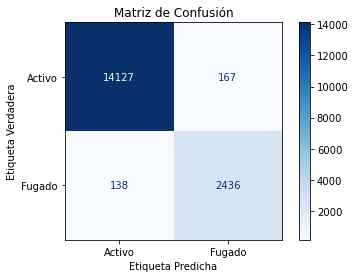

In [145]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión usando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Activo', 'Fugado'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

Importancia de las características:
                  Feature  Importance
1   Nivel_de_Satisfaccion    0.367419
5                  PQR_Si    0.189776
4                  PQR_No    0.173149
17          IBC_Cat_1M-2M    0.059575
9          Edad_Cat_31-40    0.055489
18          IBC_Cat_2M-3M    0.022797
2                Genero_F    0.022645
3                Genero_M    0.018137
7          Edad_Cat_11-20    0.017441
11         Edad_Cat_51-60    0.015937
12         Edad_Cat_61-70    0.014867
0                     Ano    0.012894
10         Edad_Cat_41-50    0.007416
8          Edad_Cat_21-30    0.006619
19          IBC_Cat_3M-4M    0.005731
20          IBC_Cat_4M-5M    0.003112
22          IBC_Cat_6M-7M    0.002504
21          IBC_Cat_5M-6M    0.001755
16           IBC_Cat_0-1M    0.001664
23          IBC_Cat_7M-8M    0.000932
24          IBC_Cat_8M-9M    0.000137
25         IBC_Cat_9M-10M    0.000004
15        Edad_Cat_91-100    0.000000
14         Edad_Cat_81-90    0.000000
6           Ed

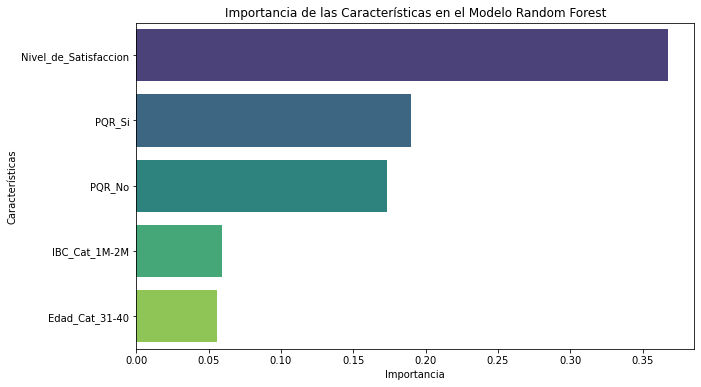

In [159]:
# Obtener la importancia de las características
feature_names=X.columns
importances = model.feature_importances_

# Crear un DataFrame para las importancias
importance_df = pandas.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Importancia de las características:")
print(importance_df)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(5), palette='viridis')
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [141]:
# Visualizar la matriz de confusión para el Random Forest
from sklearn.metrics import ConfusionMatrixDisplay

# Hacer predicciones con el Random Forest
y_pred_rf = models['Random Forest'].predict(X_test)

# Mostrar la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title('Matriz de Confusión - Random Forest')
plt.show()

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'